In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn import metrics
from matplotlib.patches import Rectangle

In [2]:
df = pd.read_excel('(미디어에버) BioParticle Counter 6개월 측정 20230314.xlsx',
                   sheet_name='data',
                  header=1)

In [3]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [4]:
df.dropna(axis=0,inplace=True)

In [5]:
df.dtypes

Day      datetime64[ns]
Time             object
Bio              object
Dust             object
T               float64
H               float64
PM2.5           float64
dtype: object

In [6]:
df['Dust']=df['Dust'].astype(int)
df['Bio']=df['Bio'].astype(int)

In [7]:
df['Date_Time']=df['Day'].astype(str)+' '+df['Time'].astype(str)
df['Date_Time'] = pd.to_datetime(df['Date_Time'])

In [8]:
df

,Day,Time,Bio,Dust,T,H,PM2.5,Date_Time
1,2022-05-01,00:03:29,11,34254,25.5,27.0,30.984,2022-05-01 00:03:29
2,2022-05-01,00:07:36,19,33980,25.5,27.0,30.750,2022-05-01 00:07:36
3,2022-05-01,00:11:43,28,33378,25.5,27.0,30.235,2022-05-01 00:11:43
4,2022-05-01,00:15:50,47,33092,25.5,27.0,29.990,2022-05-01 00:15:50
5,2022-05-01,00:19:57,7,32859,25.5,27.0,29.790,2022-05-01 00:19:57
...,...,...,...,...,...,...,...,...
63637,2022-11-20,07:53:02,487,53460,21.0,33.0,46.991,2022-11-20 07:53:02
63638,2022-11-20,07:57:08,578,53567,21.0,33.0,47.079,2022-11-20 07:57:08
63639,2022-11-20,08:01:14,424,51910,21.0,33.0,45.726,2022-11-20 08:01:14
63640,2022-11-20,08:05:20,596,52928,21.0,33.0,46.558,2022-11-20 08:05:20


In [9]:
df.resample('H', on='Date_Time').sum()

,Bio,Dust,T,H,PM2.5
Date_Time,,,,,
2022-05-01 00:00:00,344,456005,357.00,378.0,413.589
2022-05-01 01:00:00,443,477652,371.25,405.0,433.747
2022-05-01 02:00:00,481,457261,346.50,378.0,414.676
2022-05-01 03:00:00,544,484582,371.25,405.0,439.705
2022-05-01 04:00:00,646,506627,371.25,405.0,458.619
...,...,...,...,...,...
2022-11-20 04:00:00,7134,699008,308.00,448.0,617.447
2022-11-20 05:00:00,6999,763015,327.00,480.0,673.093
2022-11-20 06:00:00,6795,777517,316.00,483.0,684.962


In [10]:
#df1=df1[['Date_Time', 'PM2.5(ug/m3)', 'PM10(ug/m3)','co(ppm  )', 'no2(ppm  )', 'o3(ppm  )']]
df = df.resample('H', on='Date_Time').sum()
df=df.reset_index()
df['Date_Time'] =df['Date_Time'].values.astype(np.int64) // 10 ** 9

In [11]:
df

,Date_Time,Bio,Dust,T,H,PM2.5
0,1651363200,344,456005,357.00,378.0,413.589
1,1651366800,443,477652,371.25,405.0,433.747
2,1651370400,481,457261,346.50,378.0,414.676
3,1651374000,544,484582,371.25,405.0,439.705
4,1651377600,646,506627,371.25,405.0,458.619
...,...,...,...,...,...,...
4876,1668916800,7134,699008,308.00,448.0,617.447
4877,1668920400,6999,763015,327.00,480.0,673.093
4878,1668924000,6795,777517,316.00,483.0,684.962
4879,1668927600,6258,729375,294.00,462.0,642.312


In [12]:
X=df.drop('Bio',axis=1)
Y=df['Bio']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25)

In [14]:
y_test.shape

(1221,)

In [15]:
def willmott_index(observed, predicted):
    mean_observed = np.mean(observed)
    numerator = np.sum(np.abs(observed - predicted))
    denominator = np.sum(np.abs(observed - mean_observed))
    wi = (1 - (numerator / denominator)) * 100
    return wi

+ ==================================================================================================== +
			1-For Ridge The Performance result is: 
+ ==================================================================================================== +
Root mean squared error (RMSE) :  1275.8554685093761
--------------------------------------------------
Mean absolute error (MAE) :  897.3140365682103
--------------------------------------------------
R2 score :  0.5408395229568879
--------------------------------------------------
Willmott's Index: 31.843689251068476


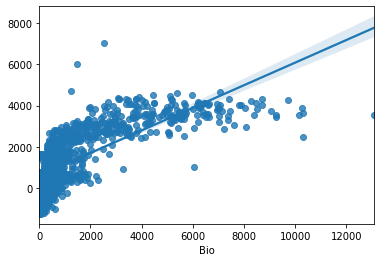

							-----------------------------------------------------------
							 Time for detection (Ridge) : 0.451 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			2-For LinearRegression The Performance result is: 
+ ==================================================================================================== +
Root mean squared error (RMSE) :  1275.8554723486288
--------------------------------------------------
Mean absolute error (MAE) :  897.3140112671922
--------------------------------------------------
R2 score :  0.5408395201935134
--------------------------------------------------
Willmott's Index: 31.843691172830503


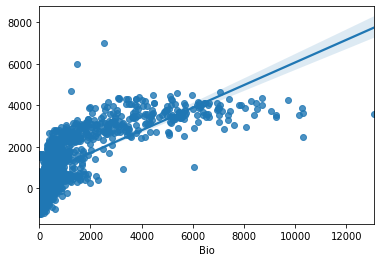

							-----------------------------------------------------------
							 Time for detection (LinearRegression) : 0.378 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			3-For KNeighborsRegressor The Performance result is: 
+ ==================================================================================================== +
Root mean squared error (RMSE) :  735.6696464876804
--------------------------------------------------
Mean absolute error (MAE) :  319.5759213759214
--------------------------------------------------
R2 score :  0.8473393122115145
--------------------------------------------------
Willmott's Index: 75.72631774659897


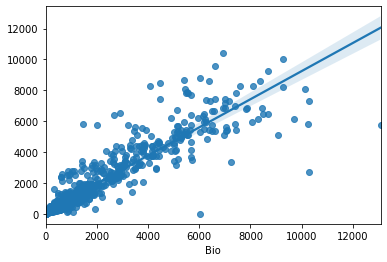

							-----------------------------------------------------------
							 Time for detection (KNeighborsRegressor) : 0.494 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			4-For Random Forest The Performance result is: 
+ ==================================================================================================== +
Root mean squared error (RMSE) :  737.8436685745905
--------------------------------------------------
Mean absolute error (MAE) :  320.4723423423423
--------------------------------------------------
R2 score :  0.8464357052748692
--------------------------------------------------
Willmott's Index: 75.65822926981228


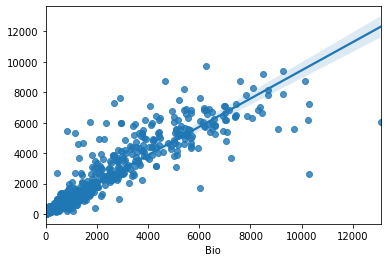

							-----------------------------------------------------------
							 Time for detection (Random Forest) : 2.019 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			5-For Decision Tree The Performance result is: 
+ ==================================================================================================== +
Root mean squared error (RMSE) :  1081.3602329089754
--------------------------------------------------
Mean absolute error (MAE) :  421.5045045045045
--------------------------------------------------
R2 score :  0.6701607545823198
--------------------------------------------------
Willmott's Index: 67.98423871652027


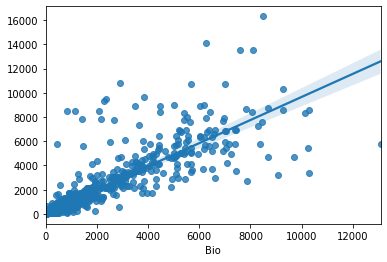

							-----------------------------------------------------------
							 Time for detection (Decision Tree) : 0.456 seconds...
							-----------------------------------------------------------



,Training Score,Testing Score,MAE,RMSE,R2 Score,Willmot Index
0,0.499700,0.540840,897.314037,1275.855469,0.540840,31.843689
1,0.499700,0.540840,897.314011,1275.855472,0.540840,31.843691
2,0.895884,0.847339,319.575921,735.669646,0.847339,75.726318
3,0.975806,0.846436,320.472342,737.843669,0.846436,75.658229
4,1.000000,0.670161,421.504505,1081.360233,0.670161,67.984239


In [16]:
# Importing Models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
#from sklearn.naive_bayes import BernoulliNB

# Importing evaluation modules
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# check the performance on diffrent regressor
models = []
models.append(('Ridge', Ridge()))
models.append(('LinearRegression', LinearRegression()))
models.append(('KNeighborsRegressor', KNeighborsRegressor()))
models.append(('Random Forest', RandomForestRegressor()))
models.append(('Decision Tree', DecisionTreeRegressor()))
#models.append(('Gaussian NB', BernoulliNB()))

train_l = []
test_l = []
mae_l = []
rmse_l = []
r2_l = []
wi_l = []

import time
i = 0
for name,model in models:
    i = i+1
    start_time = time.time()
    
    # Fitting model to the Training set
    clf = model
    clf.fit(X_train, y_train)
    
    # Scores of model
    train = model.score(X_train, y_train)
    test = model.score(X_test, y_test)
    
    train_l.append(train)
    test_l.append(test)
    
    # predict values
    predictions = clf.predict(X_test)
    # RMSE
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    rmse_l.append(rmse)
    # MAE
    mae = mean_absolute_error(y_test,predictions)
    mae_l.append(mae)
    # R2 score
    r2 = r2_score(y_test,predictions)
    r2_l.append(r2)
    
    
    



    print("+","="*100,"+")
    print('\033[1m' + f"\t\t\t{i}-For {name} The Performance result is: " + '\033[0m')
    print("+","="*100,"+")
    print('Root mean squared error (RMSE) : ', rmse)   
    print("-"*50)
    print('Mean absolute error (MAE) : ', mae)
    print("-"*50)
    print('R2 score : ', r2)
    print("-"*50)
    wi = willmott_index(y_test, predictions)
    print(f"Willmott's Index: {wi}")
    wi_l.append(wi)
    sns.regplot(x=y_test,y=predictions)
    plt.show()
        
        
    print("\t\t\t\t\t\t\t-----------------------------------------------------------")
    print(f"\t\t\t\t\t\t\t Time for detection ({name}) : {round((time.time() - start_time), 3)} seconds...")
    print("\t\t\t\t\t\t\t-----------------------------------------------------------")
    print()
    
comp = pd.DataFrame({"Training Score": train_l,
                     "Testing Score": test_l, "MAE": mae_l,
                     "RMSE": rmse_l, "R2 Score": r2_l,
                    "Willmot Index": wi_l})
comp

In [17]:

# Reshape the input data to match LSTM layer input shape
train_data = np.resize(X_train, (X_train.shape[0], X_train.shape[1], 1))
test_data = np.resize(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [18]:
train_labels=y_train
test_labels=y_test

In [31]:
from keras.models import Sequential
from keras.layers import Dense, LSTM,Bidirectional

In [29]:
model = Sequential()
model.add(LSTM(64, input_shape=(train_data.shape[1], train_data.shape[2]),return_sequences=True))  # LSTM layer with 64 units
model.add(Dense(1))  # Output layer with single neuron

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
#model.fit(train_data, train_labels, epochs=10, batch_size=32)

# Evaluate the model
#loss = model.evaluate(test_data, test_labels)
#print('Test Loss:', loss)

# Make predictions
#predictions = model.predict(test_data)



Epoch 1/50
115/115 [==============================] - 3s 9ms/step - loss: 5570888.5000 - val_loss: 5370770.0000
Epoch 2/50
115/115 [==============================] - 1s 5ms/step - loss: 5550703.5000 - val_loss: 5346021.5000
Epoch 3/50
115/115 [==============================] - 1s 6ms/step - loss: 5530403.0000 - val_loss: 5329195.5000
Epoch 4/50
115/115 [==============================] - 1s 6ms/step - loss: 5514177.0000 - val_loss: 5313452.5000
Epoch 5/50
115/115 [==============================] - 1s 6ms/step - loss: 5500074.5000 - val_loss: 5299610.5000
Epoch 6/50
115/115 [==============================] - 1s 6ms/step - loss: 5486882.0000 - val_loss: 5286410.0000
Epoch 7/50
115/115 [==============================] - 1s 5ms/step - loss: 5474028.5000 - val_loss: 5273453.5000
Epoch 8/50
115/115 [==============================] - 1s 5ms/step - loss: 5461509.0000 - val_loss: 5260861.5000
Epoch 9/50
115/115 [==============================] - 1s 5ms/step - loss: 5449214.0000 - val_loss: 52483

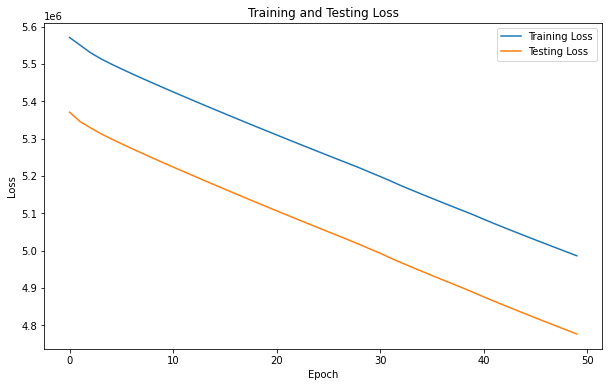

In [30]:
history = model.fit(train_data, train_labels, epochs=50, batch_size=32, validation_data=(test_data, test_labels))

# Extract training and testing losses from history
train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Plot training and testing losses
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss')
plt.plot(test_loss, label='Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Testing Loss')
plt.legend()
plt.show()

Epoch 1/50
115/115 [==============================] - 5s 20ms/step - loss: 5552409.5000 - val_loss: 5327026.5000
Epoch 2/50
115/115 [==============================] - 1s 13ms/step - loss: 5489194.0000 - val_loss: 5265596.5000
Epoch 3/50
115/115 [==============================] - 1s 12ms/step - loss: 5434953.5000 - val_loss: 5214556.0000
Epoch 4/50
115/115 [==============================] - 1s 11ms/step - loss: 5387023.5000 - val_loss: 5166952.5000
Epoch 5/50
115/115 [==============================] - 1s 12ms/step - loss: 5340032.0000 - val_loss: 5120094.5000
Epoch 6/50
115/115 [==============================] - 1s 11ms/step - loss: 5295280.5000 - val_loss: 5074285.5000
Epoch 7/50
115/115 [==============================] - 1s 11ms/step - loss: 5250360.0000 - val_loss: 5032230.5000
Epoch 8/50
115/115 [==============================] - 1s 11ms/step - loss: 5211915.5000 - val_loss: 4989908.0000
Epoch 9/50
115/115 [==============================] - 1s 11ms/step - loss: 5172876.0000 - val_lo

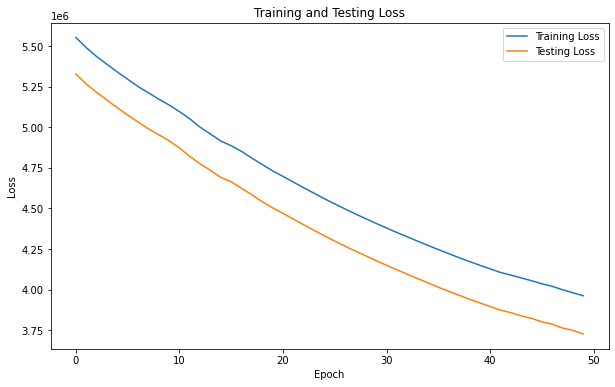

In [37]:
# Build the BiLSTM model
model = Sequential()
model.add(Bidirectional(LSTM(128), input_shape=(train_data.shape[1], train_data.shape[2])))
model.add(Dense(1))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model and record training history
history = model.fit(train_data, train_labels, epochs=50, batch_size=32, validation_data=(test_data, test_labels))

# Extract training and testing losses from history
train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Plot training and testing losses
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss')
plt.plot(test_loss, label='Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Testing Loss')
plt.legend()
plt.show()